In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

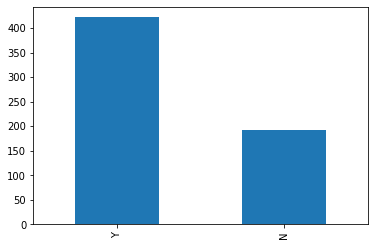

In [10]:
train['Loan_Status'].value_counts().plot.bar()

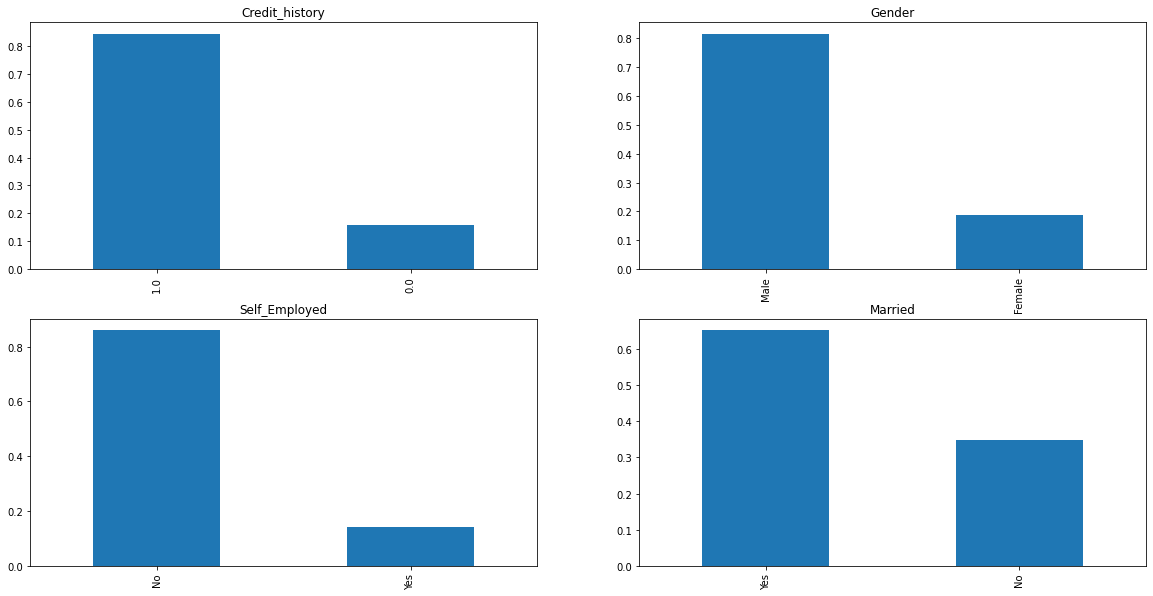

In [11]:
plt.figure(1)
plt.subplot(2,2,1)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_history',figsize=(20,10))
plt.subplot(2,2,2)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',figsize=(20,10))
plt.subplot(2,2,4)
train['Married'].value_counts(normalize=True).plot.bar(title='Married',figsize=(20,10))


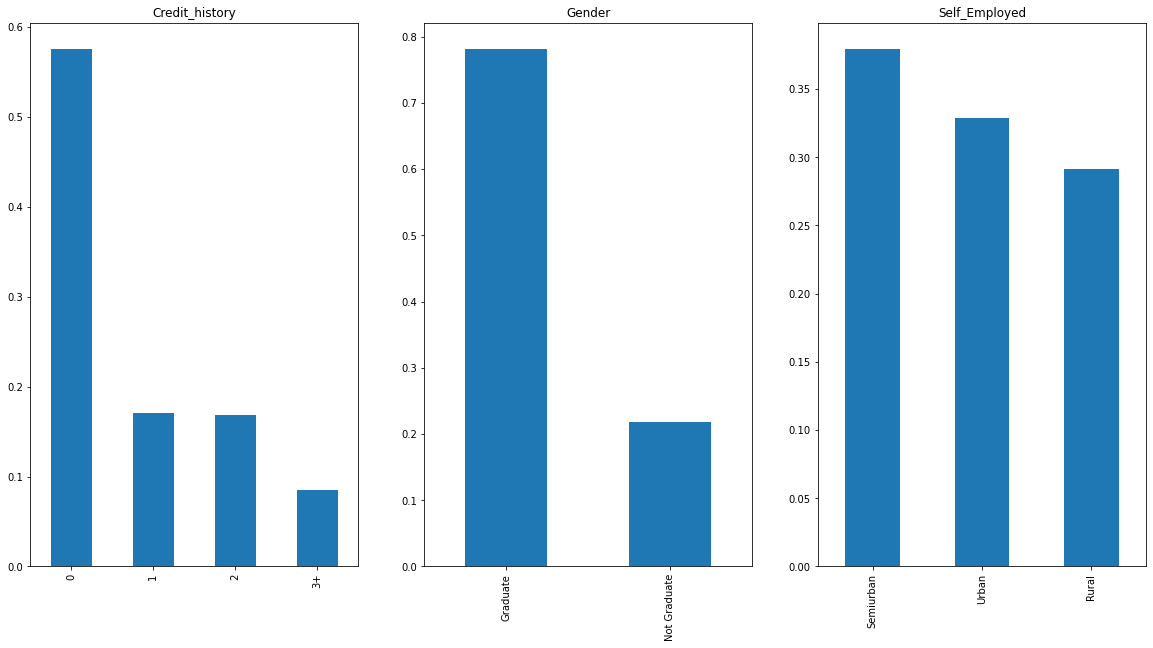

In [12]:
plt.figure(1)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Credit_history',figsize=(20,10))
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Self_Employed',figsize=(20,10))
plt.show()

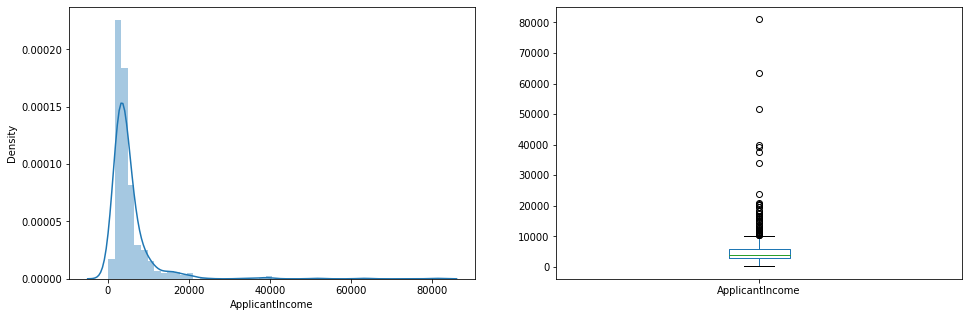

In [13]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["ApplicantIncome"]);
plt.subplot(1,2,2) 
train['ApplicantIncome'].plot.box(figsize=(16,5))



Text(0.5, 0.98, '')

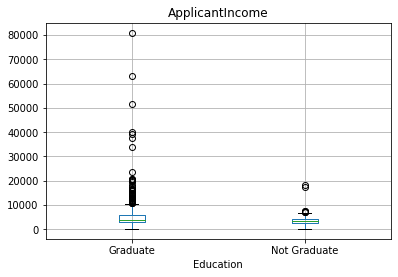

In [14]:
train.boxplot(column='ApplicantIncome',by ='Education')
plt.suptitle("")


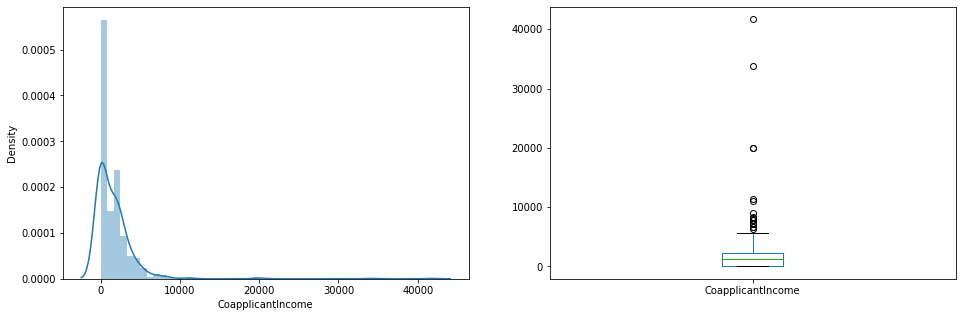

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["CoapplicantIncome"]);
plt.subplot(1,2,2) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))


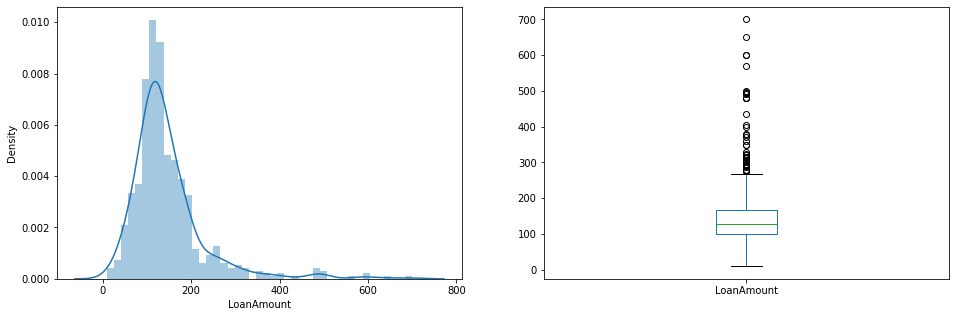

In [16]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["LoanAmount"]);
plt.subplot(1,2,2) 
train['LoanAmount'].plot.box(figsize=(16,5))


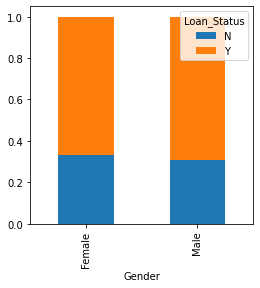

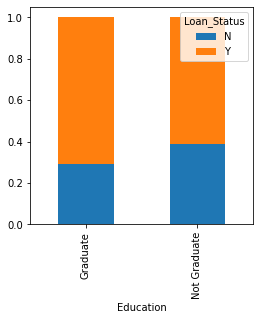

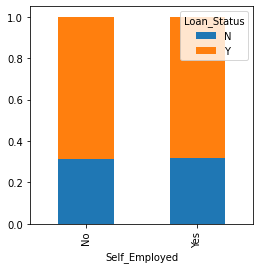

In [17]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

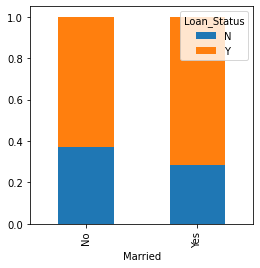

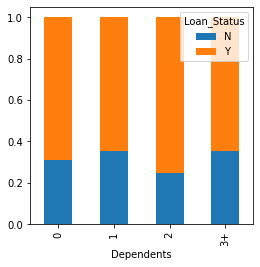

In [18]:
Married =pd.crosstab(train['Married'],train['Loan_Status'])
Married .div(Married .sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

now we will look at the relationship between remaining categoriacal independent variables and Loan_Status

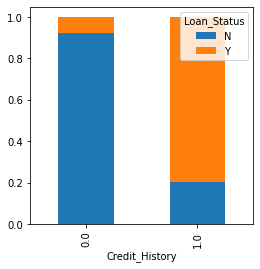

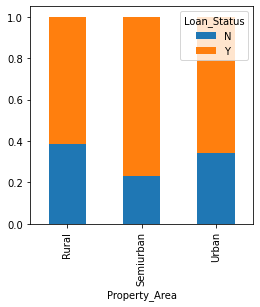

In [19]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


it seems prople with credit history as 1 are  more  likely to get their loans approved
Proportion of loans getting approved in semiurban area is higher as compared to  that in rural or urban areas

**Numerical independent Variable Vs Target Variable**

find the mean income of people foe which loan has been approved vs the mean income of people for which the  loan has not been approved

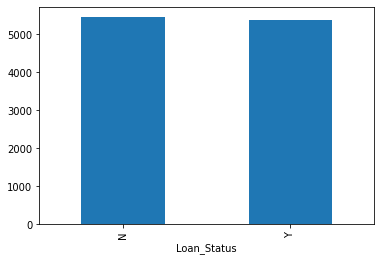

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Mean is same lets make bins for income and analyze the corresponding loan status for each bin

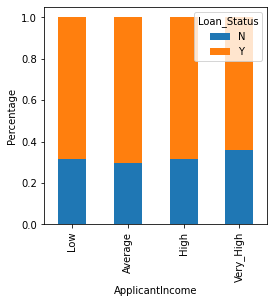

In [21]:
bins=[0,2500,4000,6000,8100]
group=['Low','Average','High','Very_High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('ApplicantIncome')
P=plt.ylabel("Percentage")


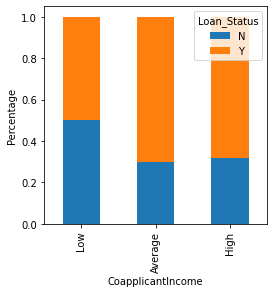

In [22]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('CoapplicantIncome')
P=plt.ylabel("Percentage")

it showa coapplicant  income is less the chances of loan approval are high.
but it is not right the possible reason behind this may be that most  of the applicant not have any coapplicant
so make a new varible and combine both applocant or co applicant income
for loan approval

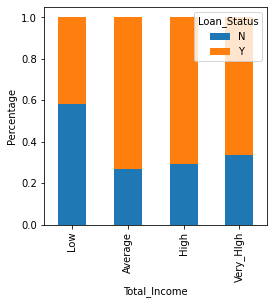

In [23]:
train['Total_income']=train["ApplicantIncome"]+train['CoapplicantIncome']
bins=[0,2500,4000,6000,8100]
group=["Low",'Average','High','Very_HIgh']
train['Total_Income_bin']=pd.cut(train['Total_income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('Total_Income')
P=plt.ylabel("Percentage")




we can see that Proportion of loans getting approved for applocants having low Total_income is very less compared to that of applicants with Average HIgh and very Hign Income

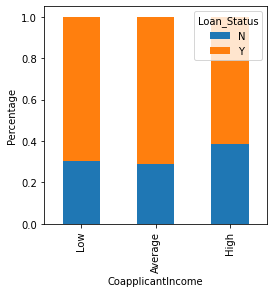

In [24]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('CoapplicantIncome')
P=plt.ylabel("Percentage")

In [25]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_income'],axis=1)

In [26]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


Co relation between all numerical variables useing the heat map

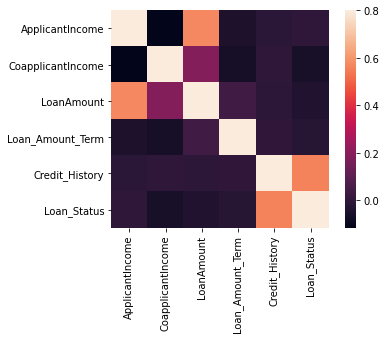

In [28]:

sns.heatmap(train.corr(), vmax=.8, square=True);


Missing value Imputation

now fill the missing values in Loan_amount_term.We will look at the value count of the loan amonut term variable

In [29]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [32]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)


In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)


In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now check null values

In [36]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)


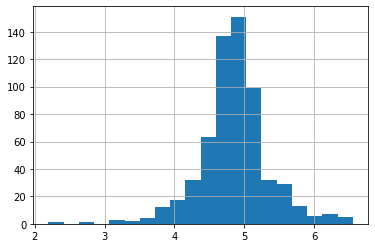

In [37]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

let us build a logistic regression model andmake predictions for the test dataset
 ***Calculate the accuracy of the Model***
 *** True positive+ true negative***
    ------------------------------------------
    **true positive +true Negative+ false positive+false negative**
  ****

In [38]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


let drop the LoanId variable as it do not have any effect on the loan status at both train and test data


In [40]:
code_numeric = {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}
train =train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test =test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)



use sklearn  for making the different models which is open source for python
sklearn requires the target variable  in a seprate dataset. drop the train dataset and save it in another dataset

In [41]:
X=train.drop("Loan_Status",axis =1)
y=train.Loan_Status

logistic takes only the numeracal values as input we have to change male and female into numerial value
Gender Male have a Value 0 if the gender is female
and value of 1  if the gender is male


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Now we will train the model on the training dataset and make predictions
we divide the train dtaset into two parts train and Validation
we can train the model on this train part and predictions for the Validation part


In [43]:
from sklearn.model_selection import train_test_split
X_train, x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.20,random_state=0)

the data set has been divided into tainging and the validation part.

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


let predict the loan status for validation set and calculate its accuracy

In [46]:
pred_cv=model.predict(x_cv)

calculate the accurate our prediction 

In [47]:
accuracy_score(y_cv,pred_cv)

0.8292682926829268

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)